In [57]:
import numpy as np
#problem 1
a=np.random.random(30).reshape(10,3)
print(a)
print(a[np.arange(10),np.argmin(abs(a-0.5),axis=1)])

[[0.20086876 0.65118127 0.33812628]
 [0.40853682 0.43344988 0.56015984]
 [0.13003525 0.2995486  0.77294011]
 [0.38957012 0.41091544 0.17432459]
 [0.9092582  0.38887797 0.36097185]
 [0.02533489 0.08343694 0.72447672]
 [0.35089114 0.39732423 0.9539485 ]
 [0.08560238 0.54831398 0.33410916]
 [0.21208171 0.55321282 0.34847067]
 [0.96687111 0.90061996 0.97153371]]
[0.65118127 0.56015984 0.2995486  0.41091544 0.38887797 0.72447672
 0.39732423 0.54831398 0.55321282 0.90061996]


In [58]:
#problem2
a=np.random.random(36).reshape(6,6)
print(a)
print(np.sum(a,axis=1)/np.min(a,axis=0))

[[0.3878948  0.72090974 0.23943795 0.12474862 0.11989825 0.29120801]
 [0.85949527 0.4692773  0.4816081  0.656354   0.28453326 0.1504536 ]
 [0.12121277 0.42454544 0.16231909 0.15296219 0.9857112  0.36107622]
 [0.63750157 0.85731891 0.44416225 0.31303951 0.99595405 0.30064849]
 [0.49051795 0.0908302  0.23817871 0.03676008 0.64359572 0.38155132]
 [0.88354575 0.306249   0.8810572  0.50278232 0.19690278 0.34803456]]
[15.54372055 31.94666147 13.6017702  96.53473824 15.69192229 20.72779668]


In [59]:
#problem 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(x)
print(np.max(x[np.nonzero(x[:-1]==0)[0]+1]))    #отбросили последний элемент, чтобы не вылезать за границы массива при прибалении единицы

[6 2 0 3 0 0 5 7 0]
5


In [60]:
#problem 4
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

np.add.at(x, i,1)

print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [61]:
#problem 5
a = np.arange(16).reshape(4, 4)
n=a.shape[0]
dict={j : [np.diag(np.flipud(a),k=i) for i in range(-n+1,n)][j][::-1].tolist() for j in range(0,2*n-1)}
print(dict)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


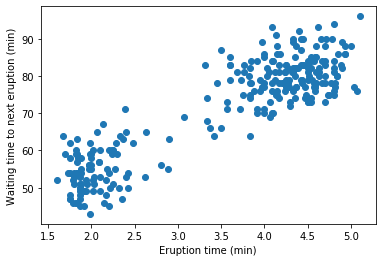

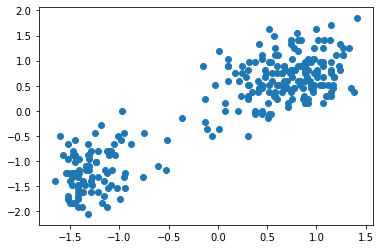

[[-1.66518349  1.73622062]
 [-0.48327842  1.78409513]]
[1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 0 1]


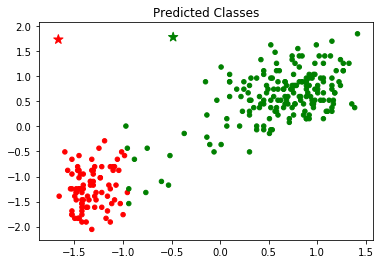

In [9]:
#problem 6
#первый шаг кластеризации.
import matplotlib.pyplot as plt 
import numpy as np
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time to next eruption (min)')
plt.show()

data=(data-np.mean(data,axis=0))/np.std(data,axis=0) #data standartizing        верно
plt.scatter(*data.T)
plt.show()

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))
print(centroids)

dist1=[np.linalg.norm(data-centroids[i,:],axis=1).reshape(-1,1) for i in range(2)]    #в общем случае вместо двойки n
dist=np.hstack(dist1)                   #посчитали расстояния до центроидов на каждой строке расстояния до двух возможных центроидов

print(np.argmin(np.hstack(dist1), axis=1)) # кто дальше

def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    
    dist0=[np.linalg.norm(data-centroids[i,:],axis=1).reshape(-1,1) for i in range(centroids.shape[0])] 
    res=np.argmin(np.hstack(dist0), axis=1)
    
    return res

labels = get_labels(data, centroids)

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

In [49]:

def value(pts,centroids,labels):                  # distortion counting 
    n=centroids.shape[0]    
    val=[np.linalg.norm(pts[labels==j]-centroids[j],axis=1).sum() for j in range(n)]
    #print(val)
    #print(sum(val))
    return sum(val)/pts.shape[0]

def kmeans(obs,k_or_guess,iter=18, thresh=1e-10):         #описываю функцию так же как в библиотеке scipy с точно до имен переменных
    if type(k_or_guess)== int :
        centroids = np.random.uniform(0, 1, k_or_guess*obs.shape[1]).reshape((k_or_guess,obs.shape[1]))  #мб надо брать из другого множества
    elif type(k_or_guess)==np.ndarray:
        centroids=np.copy(k_or_guess)
    labels=get_labels(obs, centroids)
    val=value(obs,centroids,labels)
    codebook=centroids
    distortion=val
    
    while True:
        centroids=np.array([obs[labels == label].mean(axis=0) for label in range(centroids.shape[0])])
        labels=get_labels(obs, centroids) 
        new_value=value(obs,centroids,labels)
        if new_value<distortion:
            distortion=new_value
            codebook=centroids
        if type(iter)==int:    
            iter-=1
            if iter ==0:
                break
        if  np.abs(new_value-val)<thresh:
            break
                            
    
    
    return codebook,distortion 
   

In [50]:
print(kmeans(data,2))

(array([[ 0.70970327,  0.67674488],
       [-1.26008539, -1.20156744]]), 0.47046879872915703)


In [40]:
import scipy.cluster             #проверка результатов

print(scipy.cluster.vq.kmeans(data, 2))

(array([[-1.26008539, -1.20156744],
       [ 0.70970327,  0.67674488]]), 0.4704687987291571)


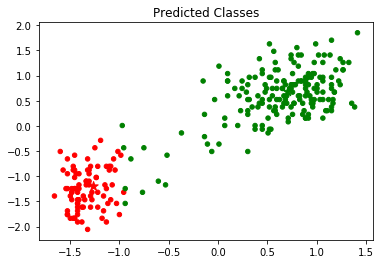

In [56]:
#визуализируем что у нас получилось 
sol_centr,distort=kmeans(data,2)
plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*sol_centr.T, c=["green", "red"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()